# Data Visualization using Seaborn (5 most important chart representations for ML projects)

I am taking restaurent tip giving data set to explain different charts whic. I found this very helpful in doing data visualization. I will explain 5 different type of chart which I mostly use in my projects.

In [2]:
import seaborn as sns

In [3]:
sns.set(style="ticks")

In [4]:
df = sns.load_dataset("tips")

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Topic 1. Heatmap to check nulls

This is the first chart which I use after running following commands.

In [6]:
df.describe() # it provides whole data essence with min max count etc.

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.info() # it provide infor regarding columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


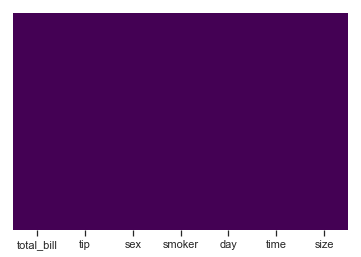

In [8]:
# heatmap chart to check missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Topic 2. PairPlot high-level relationships in data

This is the second step which I do in my projects. Most useful in getting high-level relationships in data. It helps in determining model applicability between different dimensions.

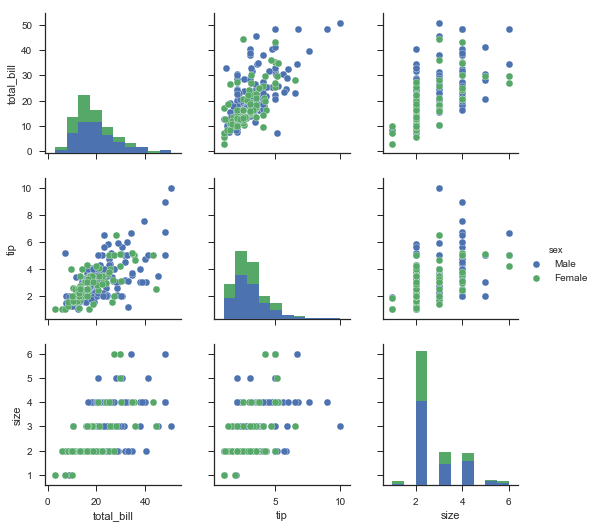

In [15]:
# pair plot - do joint plot on every possible combination(numerical columns), Hue is to distinguish dots as per category
sns.pairplot(data=df, hue='sex')

## Topic 3. Distribution Plot and Categorical Plot

### Distribution Plot

This plot is used if we want to go in detail of distribution of data. In low dimention data it is not required because we can see these relationships in pairplot itself.

In [ ]:
# visualize distribution after doing pair plot on 2 dimentions on which you want to focus.
sns.distplot(df['total_bill']) #histogram, kde(kernel density estimation) is line

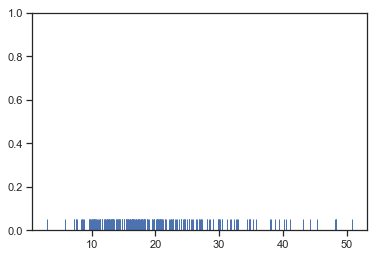

In [10]:
# Shows density similar to distplot(histogram)
sns.rugplot(df['total_bill'])

/Users/mk194903/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


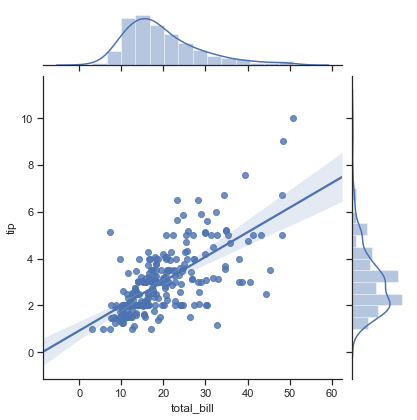

In [9]:
# combine 2 distribution plots
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg') #kind -"scatter","reg"(regression),"resid", "kde","hex"(darker if more points in hex)

### Categorical Plot

Following Categorical Plot plots are handy if you have catagories in data set. Mostly I saw useful in classification problems.

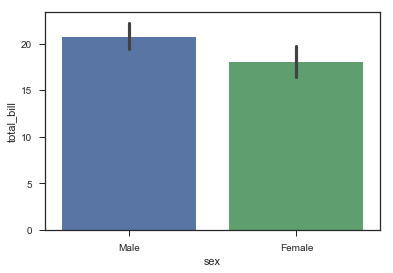

In [20]:
sns.barplot(x='sex', y='total_bill', data=df)

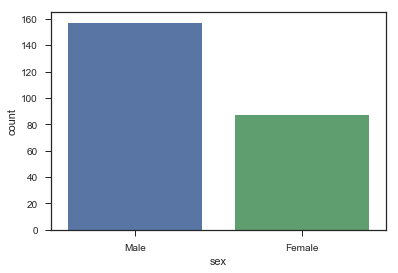

In [22]:
sns.countplot(x='sex', data=df) shows count for category

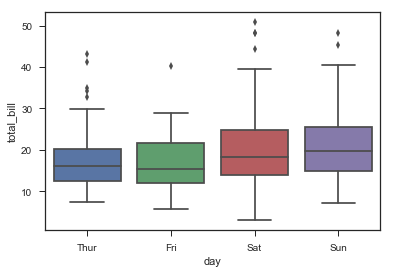

In [26]:
# Visually displaying the data distribution through their quartiles. 
sns.boxplot(x='day', y='total_bill', data=df)

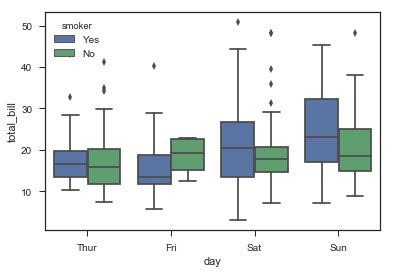

In [25]:
sns.boxplot(x='day', y='total_bill', data=df, hue='smoker') #spliting as per smoker

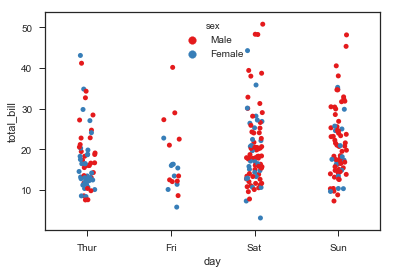

In [28]:
sns.stripplot(x="day", y="total_bill", data=df,jitter=True,hue='sex',palette='Set1')

## Topic 4. MatrixPlot to see corelation
Column and row index both should be label. This the third most important chart in my list. I use this to show corelation values as follows. this is really handy in high dimentional cases like todays midterm project. 

#### Heat map

In [30]:
#To show heatmap data should be in matrix form.
tc = df.corr()   #shows corelation in matrix form
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


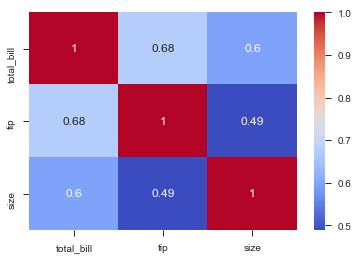

In [34]:
sns.heatmap(tc, annot=True, cmap='coolwarm') # we need to target cells which have more red side color. 
#Worm color are more important features.

In [36]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [37]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


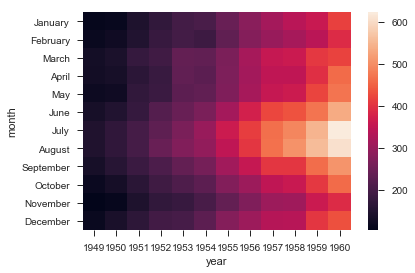

In [40]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

#### clustermap

The clustermap uses **hierarchal clustering** to produce a clustered version of the heatmap. For example:

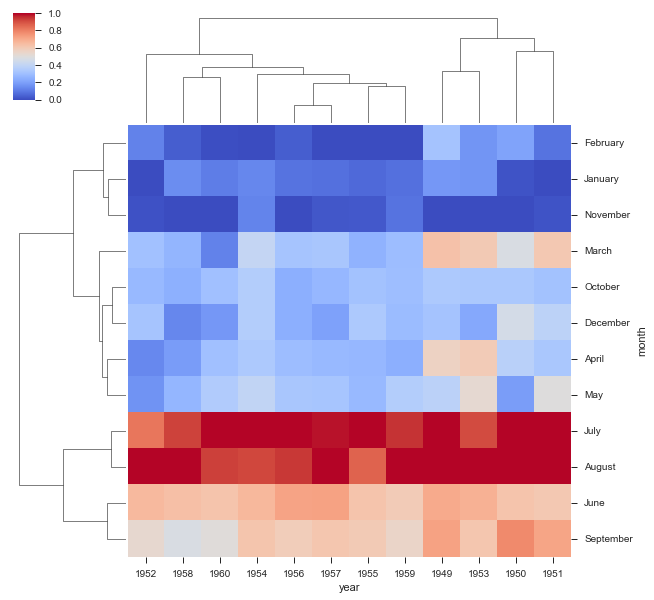

In [59]:
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Topic 5 Regression charts

This is important in regression problems. It shows data is linearly dependent on dimensions. In the following dataset with total bill, the tip is also increasing. Linear regression model can predict well in these cases.

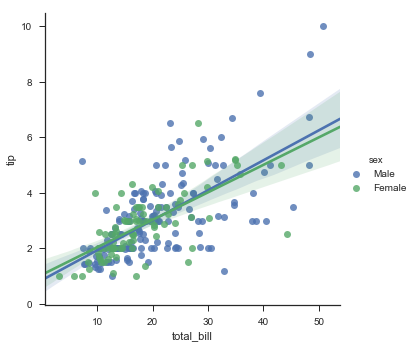

In [64]:
sns.lmplot(x='total_bill',y='tip',data=df,hue='sex')

Thank You